<H3>Sample WRDS Notebook</H3>

In [1]:
## This notebook provides an introduction to installing and importing WRDS and some sample queries to explore available data sets.
## Register for an account at https://wrds-www.wharton.upenn.edu/

In [2]:
## The following installs and imports WRDS 

In [3]:
pip install wrds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [wrds]1/2 [wrds]
Note: you may need to restart the kernel to use updated packages.


In [4]:
import wrds

In [5]:
## The following defines the function of your WRDS connection.You can replace "fx" with any text. 
## Login with your WRDS username and password when prompted. Creating a .pgpass file is recommended.

In [6]:
fx = wrds.Connection()

Enter your WRDS username [jovyan]: pei05lun
Enter your password: ········


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [7]:
## This imports a few commonly used python libraries.

In [8]:
import numpy as np
import pandas as pd
import datetime as dt
import psycopg2 
import matplotlib.pyplot as plt

In [9]:
## The following lists all WRDS data sets or "libraries" we subscribe to. These can also be explored using the web interface.

In [10]:
fx.list_libraries()

['aha_sample',
 'ahasamp',
 'audit',
 'audit_audit_comp',
 'audit_common',
 'audit_corp_legal',
 'auditsmp',
 'auditsmp_all',
 'bank',
 'bank_all',
 'bank_premium_samp',
 'banksamp',
 'block',
 'block_all',
 'boardex',
 'boardex_na',
 'boardex_trial',
 'boardsmp',
 'bvd_amadeus_trial',
 'bvd_bvdbankf_trial',
 'bvd_orbis_trial',
 'bvdsamp',
 'calcbench_trial',
 'calcbnch',
 'candid_samp',
 'cboe',
 'cboe_all',
 'cboe_sample',
 'cboesamp',
 'cddsamp',
 'ciq',
 'ciq_common',
 'ciq_transcripts',
 'ciqsamp',
 'ciqsamp_capstrct',
 'ciqsamp_common',
 'ciqsamp_keydev',
 'ciqsamp_pplintel',
 'ciqsamp_ratings',
 'ciqsamp_transactions',
 'ciqsamp_transcripts',
 'cisdmsmp',
 'columnar',
 'comp',
 'comp_bank_daily',
 'comp_execucomp',
 'comp_global_daily',
 'comp_na_daily_all',
 'comp_segments_hist_daily',
 'comp_urq',
 'comph',
 'compsamp',
 'compsamp_all',
 'compsamp_snapshot',
 'compseg',
 'contrib',
 'contrib_as_filed_financials',
 'contrib_bond_firm_link',
 'contrib_ceo_turnover',
 'contrib_ch

In [11]:
## The following lists the tables in the djones (Historical Dow Jones Indexes) library. In this library there are only two tables.

In [12]:
fx.list_tables(library='djones')

['djdaily', 'djmonthly']

In [13]:
fx.describe_table(library='djones', table='djmonthly')
## This describe the "monthly" table. For detailed descriptions of these variables see: 
## https://wrds-www.wharton.upenn.edu/pages/get-data/dow-jones-averages-total-return-indexes/dow-jones-monthly/

Approximately 2429 rows in djones.djmonthly.


,name,nullable,type,comment
0,date,True,DATE,Date
1,djc,True,DOUBLE PRECISION,Composite Close
2,djct,True,DOUBLE PRECISION,Composite Total Return Close
3,dji,True,DOUBLE PRECISION,Industrial Close
4,djit,True,DOUBLE PRECISION,Industrial Total Return Close
5,djt,True,DOUBLE PRECISION,Transportation Close
6,djtt,True,DOUBLE PRECISION,Transportation Total Return Close
7,dju,True,DOUBLE PRECISION,Utility Close
8,djut,True,DOUBLE PRECISION,Utility Total Return Close
9,d10,True,DOUBLE PRECISION,Industrial Average 10 Close


In [14]:
## This retrieves all Dow Jones monthly index variables starting from 2000-01-01 using a raw_sql command.
djm_data = fx.raw_sql("select * FROM djones.djmonthly WHERE date>'2000-01-01'")
djm_data

,date,djc,djct,dji,djit,djt,djtt,dju,djut,d10,d10t,d5,d5t
0,2000-01-26,<NA>,<NA>,11032.99,15473.31,2664.79,3231.05,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2000-01-31,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,808.96,1350.59,888.29,1447.55
2,2000-02-01,3101.97,4415.75,<NA>,<NA>,<NA>,<NA>,312.95,653.55,<NA>,<NA>,<NA>,<NA>
3,2000-02-25,<NA>,<NA>,9862.12,13854.48,2351.26,2856.76,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,2000-02-29,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,726.31,1216.67,780.2,1272.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2008-04-25,<NA>,<NA>,12891.86,21494.95,5117.37,6846.16,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
243,2008-05-01,4543.16,7717.15,<NA>,<NA>,<NA>,<NA>,516.84,1456.23,<NA>,<NA>,<NA>,<NA>
244,2008-05-23,<NA>,<NA>,12479.63,20876.01,5145.14,6894.79,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
245,2008-05-30,4514.44,7690.14,<NA>,<NA>,<NA>,<NA>,521.65,1476.33,<NA>,<NA>,<NA>,<NA>


In [15]:
## This retrieves the first two years of the Dow Jones Monthly Industial average closing values (dji). 
dow_jones_index = fx.raw_sql('SELECT date, dji FROM djones.djmonthly LIMIT 24')
dow_jones_index

,date,dji
0,1896-05-26,40.94
1,1896-06-26,37.89
2,1896-07-24,31.54
3,1896-08-26,30.29
4,1896-09-25,36.61
5,1896-10-26,38.71
6,1896-11-25,42.47
7,1896-12-24,40.02
8,1897-01-26,42.22
9,1897-02-26,41.29


Text(0, 0.5, 'Dow Jones Industrial Average')

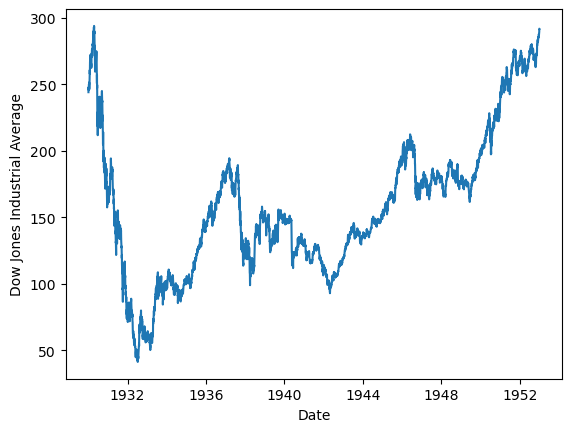

In [16]:
## This plot shows the history of the Dow Jones Industrials from 1930 to 1953.  
## Note that the data from this library was discontinued in 2008 
datadaily = fx.raw_sql("select date,dji from djones.djdaily WHERE date BETWEEN '1930-01-01' AND '1953-01-01'", date_cols=['date'], index_col=['date'])
plt.plot(datadaily),
plt.xlabel('Date')
plt.ylabel('Dow Jones Industrial Average')

In [17]:
##This get_table command retrieves the first 10 observations from the Compustat Library (comp) company table.
company1 = fx.get_table(library='comp', table='company',obs=10)
company1

,conm,gvkey,add1,add2,add3,add4,addzip,busdesc,cik,city,...,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate,curr_sp500_flag
0,A & E PLASTIK PAK INC,001000,<NA>,<NA>,<NA>,<NA>,<NA>,A & E Plastik Pak Inc. is a commodity chemical...,<NA>,<NA>,...,3089,325,978,<NA>,<NA>,0,<NA>,1978-06-30,<NA>,0.0
1,A & M FOOD SERVICES INC,001001,1924 South Utica Avenue,<NA>,<NA>,<NA>,94104,<NA>,0000723576,Tulsa,...,5812,420,978,<NA>,OK,0,<NA>,1986-07-31,<NA>,0.0
2,AAI CORP,001002,124 Industry Lane,<NA>,<NA>,<NA>,21030-0126,"Textron Systems Corporation designs, develops,...",0001306124,Hunt Valley,...,3825,230,940,<NA>,MD,0,www.textronsystems.com,1977-03-31,<NA>,0.0
3,A.A. IMPORTING CO INC,001003,7700 Hall Street,<NA>,<NA>,<NA>,63125,"A.A. Importing Company, Inc. designs, manufact...",0000730052,St. Louis,...,5712,449,976,<NA>,MO,3,www.aaimporting.com,1992-04-30,<NA>,0.0
4,AAR CORP,001004,"One AAR Place, 1100 North Wood Dale Road",<NA>,<NA>,<NA>,60191,AAR Corp. provides products and services to co...,0000001750,Wood Dale,...,5080,110,925,B,IL,0,www.aarcorp.com,<NA>,1972-04-24,0.0
5,A.B.A. INDUSTRIES INC,001005,10260 US Highway 19 North,<NA>,<NA>,<NA>,33782,A.B.A. Industries Inc. was acquired by McSwain...,<NA>,Pinellas Park,...,3724,110,925,<NA>,FL,0,<NA>,1983-01-31,<NA>,0.0
6,ABC INDS INC,001006,301 Kings Highway,<NA>,<NA>,<NA>,46590,"ABC Industries, Inc. manufactures and supplies...",<NA>,Winona Lake,...,2711,415,976,<NA>,IN,3,www.abc-industries.net,1983-06-30,<NA>,0.0
7,ABKCO INDUSTRIES INC,001007,"1700 Broadway, Suite 41",<NA>,<NA>,<NA>,10019,"ABKCO Music & Records, Inc. is a prominent ind...",0000001882,New York,...,3652,220,925,<NA>,NY,3,www.abkco.com,1986-12-31,<NA>,0.0
8,ABM COMPUTER SYSTEMS INC,001008,3 Whatney,<NA>,<NA>,<NA>,92714,ABM Computer Systems Inc. was acquired by Fran...,<NA>,Irvine,...,3577,188,940,<NA>,CA,0,<NA>,1987-10-31,<NA>,0.0
9,ABS INDUSTRIES INC,001009,"Interstate Square, Suite 300",<NA>,<NA>,<NA>,44904,"ABS Industries, Inc., through Colfor and Colma...",0000313368,Willoughby,...,3460,355,925,<NA>,OH,3,<NA>,1996-12-31,<NA>,0.0


In [18]:
## Same Query but narrows down to specific columns. The gvkey is a unique identifier used by Compustat.
company_narrow = fx.get_table(library='comp', table='company', columns = ['conm', 'gvkey', 'busdesc', 'state', 'sic', 'cik'], 
    obs=5)
company_narrow

,conm,gvkey,busdesc,state,sic,cik
0,A & E PLASTIK PAK INC,001000,A & E Plastik Pak Inc. is a commodity chemical...,<NA>,3089,<NA>
1,A & M FOOD SERVICES INC,001001,<NA>,OK,5812,0000723576
2,AAI CORP,001002,"Textron Systems Corporation designs, develops,...",MD,3825,0001306124
3,A.A. IMPORTING CO INC,001003,"A.A. Importing Company, Inc. designs, manufact...",MO,5712,0000730052
4,AAR CORP,001004,AAR Corp. provides products and services to co...,IL,5080,0000001750


In [19]:
##The following lists the tables in the boardex_na (Boardex North America) library. Boardex has biographical data for executives and board members.
fx.list_tables(library='boardex_na')

['na_board_characteristics',
 'na_board_dir_announcements',
 'na_board_dir_committees',
 'na_board_education_assoc',
 'na_board_listed_assoc',
 'na_board_nfp_assoc',
 'na_board_other_assoc',
 'na_board_unlisted_assoc',
 'na_company_profile_advisors',
 'na_company_profile_details',
 'na_company_profile_market_cap',
 'na_company_profile_sr_mgrs',
 'na_company_profile_stocks',
 'na_dir_characteristics',
 'na_dir_education_assoc',
 'na_dir_listed_assoc',
 'na_dir_nfp_assoc',
 'na_dir_other_assoc',
 'na_dir_profile_achievements',
 'na_dir_profile_details',
 'na_dir_profile_education',
 'na_dir_profile_emp',
 'na_dir_profile_other_activ',
 'na_dir_standard_remun',
 'na_dir_unlisted_assoc',
 'na_ltip_compensation',
 'na_ltip_wealth',
 'na_options_compensation',
 'na_options_wealth',
 'na_wrds_company_dir_names',
 'na_wrds_company_names',
 'na_wrds_company_networks',
 'na_wrds_company_profile',
 'na_wrds_company_region',
 'na_wrds_dir_profile_all',
 'na_wrds_dir_profile_emp',
 'na_wrds_individ

In [20]:
## This gives the first 10 observations from the Boardex Library education association table.
Boards = fx.get_table(library='boardex_na', table='na_board_education_assoc',obs=8)
Boards

,boardname,companyname,directorname,overlapyearstart,overlapyearend,orgtype,boardid,companyid,directorid
0,NUTRACEUTICAL INTERNATIONAL CORP (De-listed 08...,Harvard Business School Harvard University,Matt Levin,1995,1996,Universities,22725.0,63013.0,341015.0
1,Schnader Harrison Segal & Lewis LLP,US Green Building Council,Ron Cusano,2013,2014,Private,78842.0,637697.0,1876771.0
2,LEVEL 3 COMMUNICATIONS INC (De-listed 11/2017),ITT Technical Institute (Ceased Trading 09/2016),Anthony Nowak,2004,2005,Private,18745.0,63272.0,1862735.0
3,MEDTOX SCIENTIFIC INC (De-listed 07/2012),Opus College of Business University of St Thomas,Jim Schoonover,2005,2006,Universities,20184.0,666092.0,446232.0
4,ACUSPHERE INC (De-listed 01/2009),Harvard School of Public Health,Doctor Arian Pano,2008,2009,Universities,249492.0,63160.0,1910334.0
5,BLACK & DECKER CORP (De-listed 03/2010),Loyola College in Maryland,Ken Kelly Jr,1982,1987,Universities,4556.0,736426.0,481385.0
6,CANGENE CORP (De-listed 02/2014),University of Colorado Denver,Doctor Chris Sinclair,2008,2009,Universities,5661.0,62259.0,1280334.0
7,IOMAI CORP (De-listed 08/2008),George Washington University (GW) (The),Jin-Sook Chung,1998,1999,Universities,484942.0,60749.0,513078.0


In [21]:
## This is an advanced join command from two compustat libraries: fundamentals and monthly securities prices. Joining data sets is your economics data superpower  
fx.raw_sql("""
    SELECT a.gvkey, a.datadate, a.tic, a.conm, a.at, a.aco, a.capx, b.prccm, b.cshoq, b.trfm
    FROM comp.funda a
    JOIN comp.secm b ON a.gvkey = b.gvkey AND a.datadate = b.datadate
    WHERE a.tic = 'AAPL' AND a.datafmt = 'STD' AND a.consol = 'C' AND a.indfmt = 'INDL'
""")

,gvkey,datadate,tic,conm,at,aco,capx,prccm,cshoq,trfm
0,001690,1981-09-30,AAPL,APPLE INC,254.838,8.067,24.529,15.25,55.309,1.0
1,001690,1982-09-30,AAPL,APPLE INC,357.787,11.312,26.47,18.25,57.123,1.0
2,001690,1983-09-30,AAPL,APPLE INC,556.579,46.832,52.666,23.125,59.198,1.0
3,001690,1984-09-30,AAPL,APPLE INC,788.786,49.806,39.614,25.125,60.535,1.0
4,001690,1985-09-30,AAPL,APPLE INC,936.177,97.944,54.064,15.75,61.85,1.0
5,001690,1986-09-30,AAPL,APPLE INC,1160.128,92.913,66.629,33.5,62.628,1.0
6,001690,1987-09-30,AAPL,APPLE INC,1477.931,110.941,86.127,56.5,126.088,1.0026
7,001690,1988-09-30,AAPL,APPLE INC,2082.086,136.991,144.001,43.25,122.768,1.0109
8,001690,1989-09-30,AAPL,APPLE INC,2743.899,217.277,238.993,44.5,126.27,1.0208
9,001690,1990-09-30,AAPL,APPLE INC,2975.707,288.894,224.305,29.0,115.359,1.0324


In [22]:
## This notebook was derived in part from examples on the WRDS web site. For more info see:
## https://wrds-www.wharton.upenn.edu/pages/classroom/using-jupyter-at-wrds-notebook/
## https://wrds-www.wharton.upenn.edu/pages/support/programming-wrds/programming-python/querying-wrds-data-python/